In [1]:
import pickle
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import pandas as pd

In [2]:
directory = '/mnt/home/jbielecki1/NEMA/10000000/'
modelFileName = 'ADA/adaEstimatorsReduced500Depth5'
max_depth = 5

In [3]:
model = pickle.load(open(directory + modelFileName, 'rb'))

In [6]:
attributes = [
    'e1',
    'e2',
    'eSum',
    'deg2D',
    'deg3D',
    'lorL',
    'dt'
]
X_test = pickle.load(open(directory + 'xTest', 'rb'))[attributes]
y_test = pickle.load(open(directory + 'yTest', 'rb'))

In [7]:
y_pred_prob = model.predict_proba(X_test)[:,1]
y_pred = y_pred_prob > 0.5

In [8]:
class_test = y_test[["class"]].values
y_test = y_test[['newClass']].values

In [9]:
print("Accuracy: " + str(accuracy_score(y_pred, np.array(y_test))*100) + "%")

Accuracy: 85.68205%


In [10]:
def plotFeatureImportances(features, importances, modelName):
    y_pos = np.arange(features.size)
    plt.clf()
    indexes = np.argsort(importances)
    plt.title("Feature importances - " + modelName)
    plt.barh(y_pos, np.sort(importances))
    plt.yticks(y_pos, features[indexes])
    plt.xlabel('F score')
    plt.ylabel("Feature")
    plt.show()

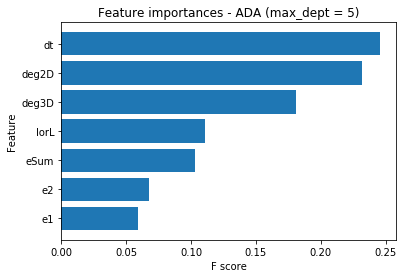

In [11]:
plotFeatureImportances(X_test.columns, model.feature_importances_, 'ADA (max_dept = ' + str(max_depth) + ')')

In [12]:
pPsOrginalPositive = X_test[y_test > 0]
pPsOrginalNegative = X_test[y_test == 0]
pPsPredictedPositive = X_test[y_pred]
pPsPredictedNegative = X_test[y_pred == 0]

In [13]:
FP = len(pd.merge(pPsPredictedPositive,pPsOrginalNegative, how='inner'))
TP = len(pd.merge(pPsPredictedPositive,pPsOrginalPositive, how='inner'))
TN = len(pd.merge(pPsPredictedNegative,pPsOrginalNegative, how='inner'))
FN = len(pd.merge(pPsPredictedNegative,pPsOrginalPositive, how='inner'))

In [14]:
ACC = (TP + TN)/len(X_test) # accuracy
TPR = TP/(TP + FN) # recall
TNR = TN/(TN + FP) # selectivity
PPV = TP/(TP + FP) # precision
FPR = FP/(FP + TN) # background acceptance

print("Negative events (starting point of accuracy): " + str(len(y_test[y_test != 1])/len(y_test)*100.0) + "%")
print("Accuracy: " + str(ACC*100) + "%")
print("Recall: " + str(TPR*100) + "%")
print("Selectivity: " + str(TNR*100) + "%")
print("Precision: " + str(PPV*100) + "%")
print("Backgroung acceptance: " + str(FPR*100) + "%")

Negative events (starting point of accuracy): 70.79915%
Accuracy: 85.68205%
Recall: 92.49234183251515%
Selectivity: 82.87317008749399%
Precision: 69.01520920320333%
Backgroung acceptance: 17.12682991250601%


In [15]:
X_test_class_1 = X_test[class_test == 1]
X_test_class_2 = X_test[class_test == 2]
X_test_class_3 = X_test[class_test == 3]
X_test_class_4 = X_test[class_test == 4]
X_test_pred_1 = X_test[y_pred == 1]
X_test_pred_0 = X_test[y_pred == 0]

In [16]:
print("Percentage of 1 class probes: " + str(round(len(X_test_class_1)/len(X_test)*100,2))+ "%")
print("Percentage of 2 class probes: " + str(round(len(X_test_class_2)/len(X_test)*100,2))+ "%")
print("Percentage of 3 class probes: " + str(round(len(X_test_class_3)/len(X_test)*100,2))+ "%")
print("Percentage of 4 class probes: " + str(round(len(X_test_class_4)/len(X_test)*100,2))+ "%")

Percentage of 1 class probes: 29.2%
Percentage of 2 class probes: 19.07%
Percentage of 3 class probes: 1.92%
Percentage of 4 class probes: 49.8%
